In [1]:
from RuleTree.tree.RuleTreeClassifier import RuleTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import itertools
import pandas as pd
import numpy as np
from RuleTree.stumps.instance_stumps import * 

In [2]:
pt_stump = pt_stump_call()
obl_pt_stump = obl_pt_stump_call()
proximity_stump = multi_pt_stump_call()
oblique_proximity_stump = multi_obl_pt_stump_call()

### GunPoint TimeSeries

In [3]:
df_train = pd.read_csv('datasets/split_datasets/mstz_GunPoint_train.csv')
df_test = pd.read_csv('datasets/split_datasets/mstz_GunPoint_test.csv')

In [4]:
X_train = df_train.drop(columns = ['label']).values
y_train = np.array(df_train.label)

In [5]:
X_sampled = X_train
y_sampled = y_train

In [9]:
# Fit the decision tree classifier
clf = RuleTreeClassifier(max_depth=4, 
                         random_state=42,
                         distance_measure='euclidean',
                         base_stumps=[pt_stump])
clf.fit(X_sampled, y_sampled)

In [11]:
clf.print_rules(clf.get_rules())

|--- P_10 <= 6.237	50
|   |--- P_5 <= 1.34	20
|   |    output: 1
|   |--- P_5 > 1.34
|   |    output: 0
|--- P_10 > 6.237
|   |--- P_41 <= 6.683	30
|   |   |--- P_16 <= 0.86	6
|   |   |    output: 1
|   |   |--- P_16 > 0.86
|   |   |    output: 0
|   |--- P_41 > 6.683
|   |   |--- P_24 <= 0.912	24
|   |   |    output: 0
|   |   |--- P_24 > 0.912
|   |   |    output: 1


In [12]:
pivots_sampled = [10,5,41,16,24]
pivot_indexes = pivots_sampled

In [13]:
y_train[[pivot_indexes]]

array([[0, 1, 0, 1, 0]])

In [21]:
# Fit the decision tree classifier
clf = RuleTreeClassifier(max_depth=4, 
                         random_state=42,
                         distance_measure='euclidean',
                         base_stumps=[proximity_stump], prune_useless_leaves=True)
clf.fit(X_sampled, y_sampled)

In [22]:
clf.print_rules(clf.get_rules())


|--- closer to 27 	50
|   |--- closer to 27 	30
|   |   |--- closer to 27 	21
|   |   |   |--- closer to 29 	5
|   |   |   |    output: 0
|   |   |   |--- closer to 23
|   |   |   |    output: 1
|   |   |--- closer to 38
|   |   |   |--- closer to 27 	16
|   |   |   |    output: 0
|   |   |   |--- closer to 6
|   |   |   |    output: 1
|   |--- closer to 19
|   |    output: 1
|--- closer to 40
|   |--- closer to 3 	20
|   |   |--- closer to 48 	10
|   |   |    output: 0
|   |   |--- closer to 5
|   |   |    output: 1
|   |--- closer to 1
|   |   |--- closer to 2 	10
|   |   |   |--- closer to 2 	3
|   |   |   |    output: 0
|   |   |   |--- closer to 40
|   |   |   |    output: 1
|   |   |--- closer to 1
|   |   |    output: 1


In [28]:
pivots_sampled = [27,19,29,23,38,40,3,48,1,2]
pivot_indexes = pivots_sampled

In [29]:
y_train[[pivot_indexes]]

array([[0, 1, 0, 1, 1, 1, 0, 0, 1, 0]])

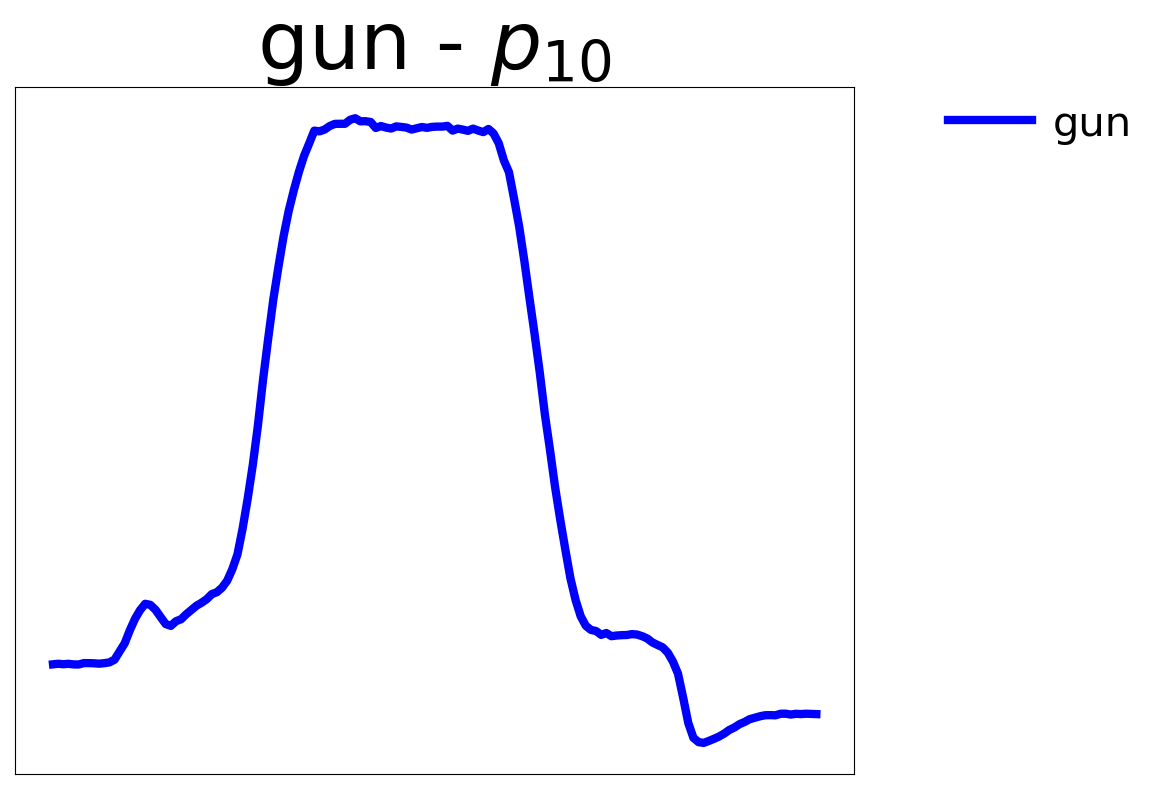

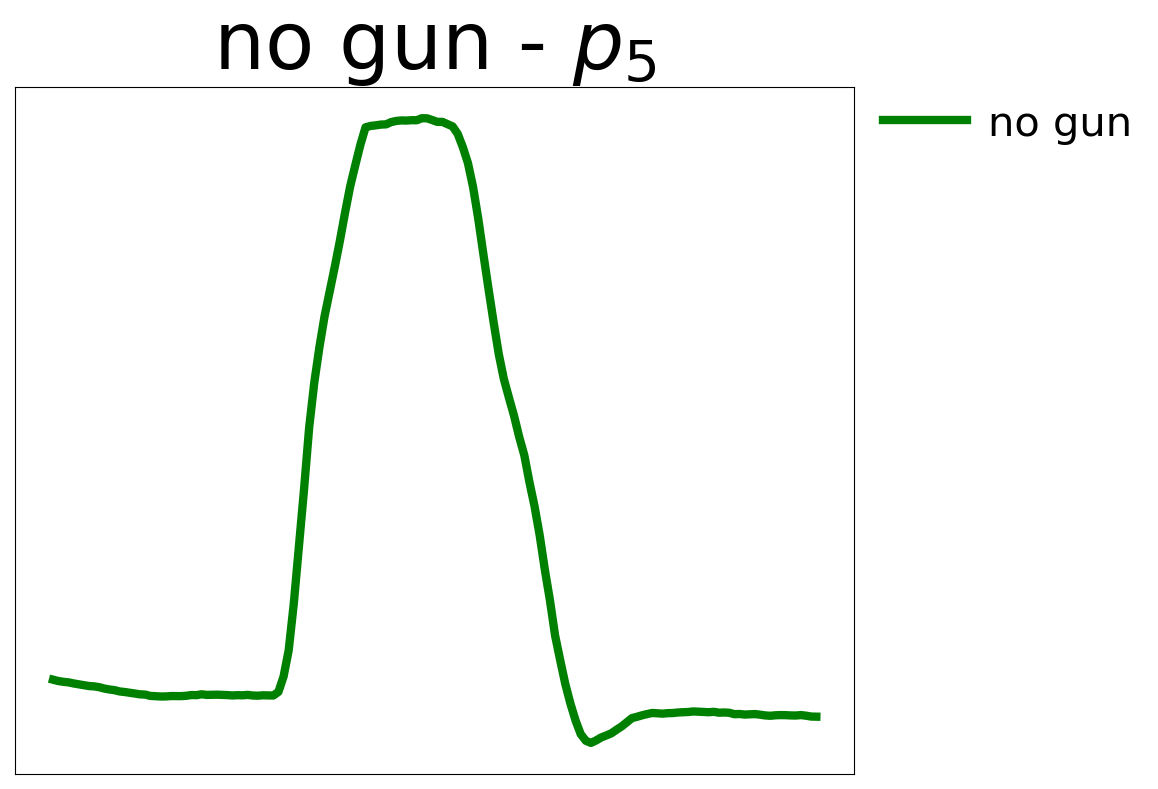

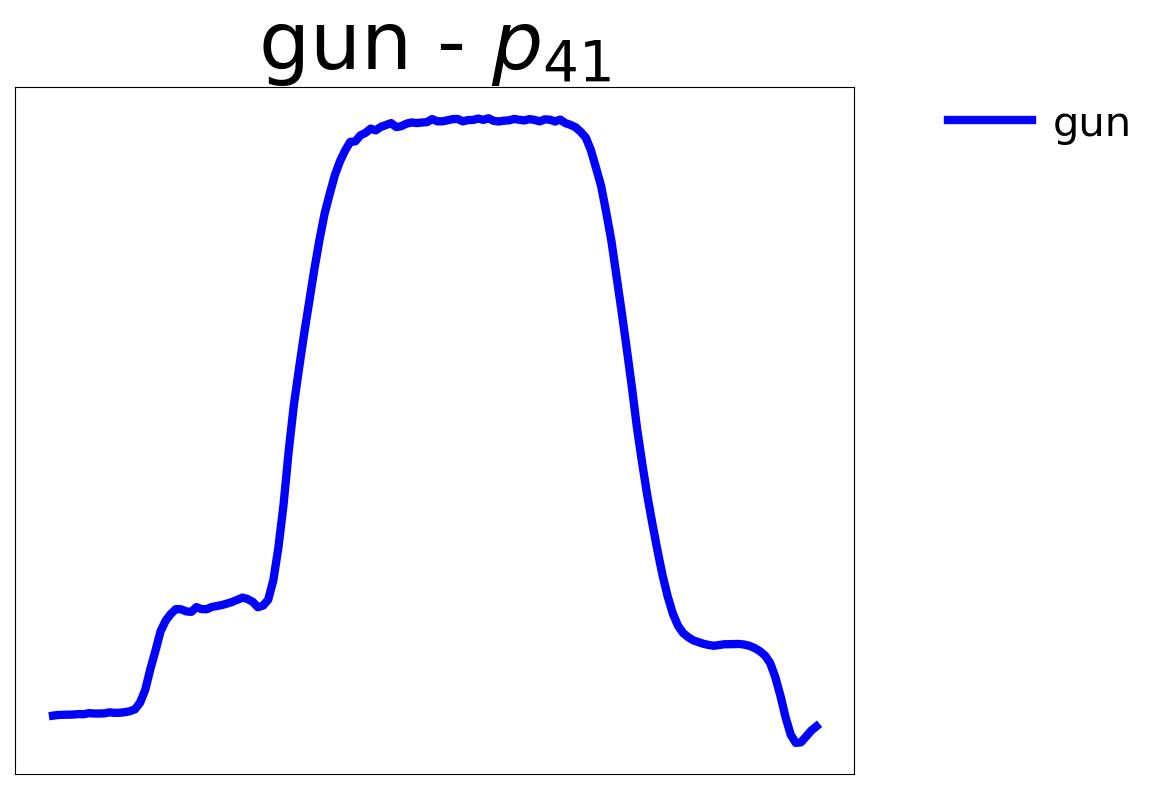

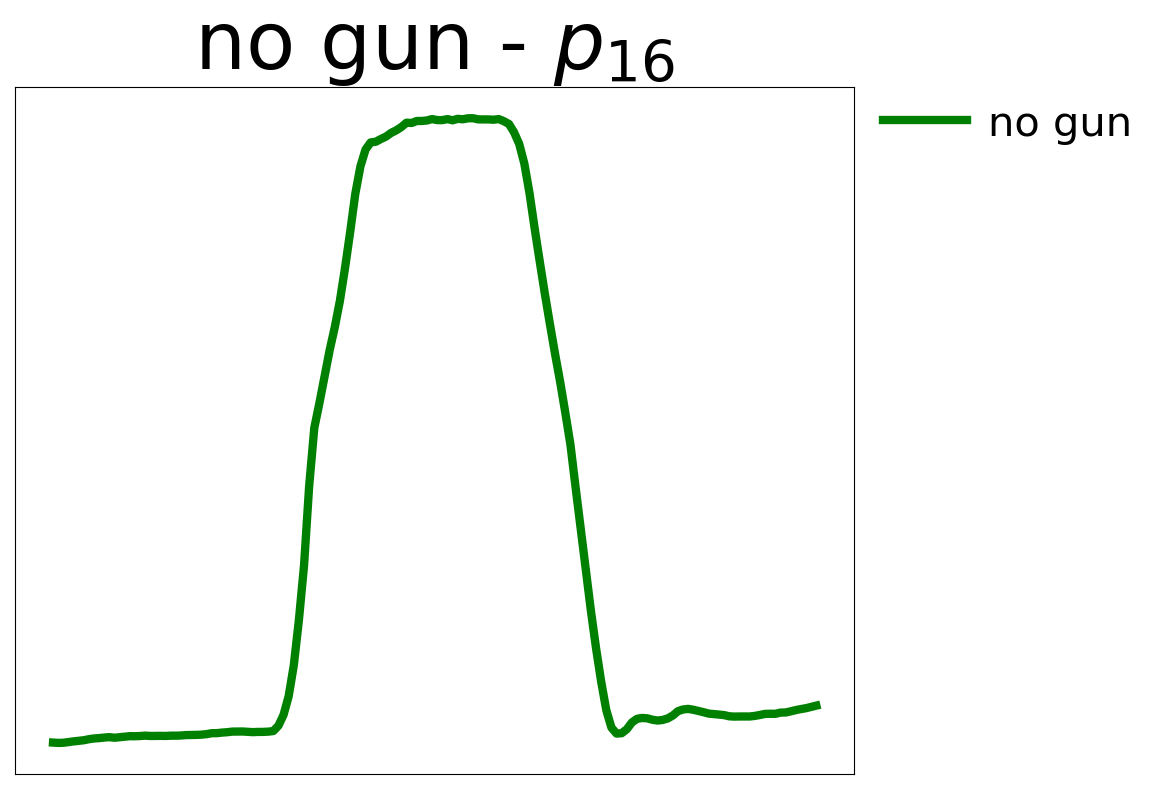

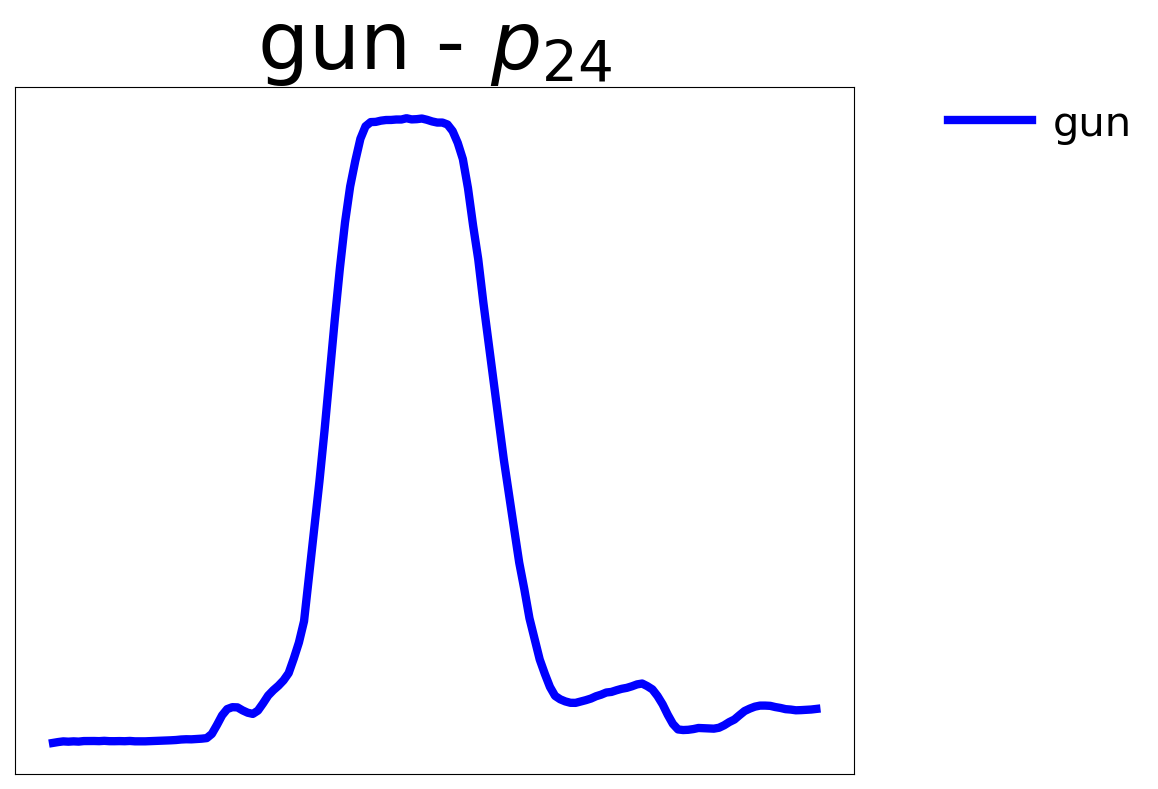

In [16]:
import os

label_dict = {1: 'no gun', 0: 'gun'}

for ind in pivots_sampled:
    ts = df_train.drop(columns=['label']).iloc[ind].values
    label = int(df_train.iloc[ind].label)

    color = 'green' if label == 1 else 'blue'

    plt.figure(figsize=(12, 8))
    title = f'{label_dict[label]} - $p_{{{ind}}}$'
    plt.title(title, fontsize=58)

    plt.plot(ts, color=color, linewidth=6, label=label_dict[label])

    # Remove ticks
    plt.xticks([])
    plt.yticks([])

    # Add legend
    legend = plt.legend(
        loc='upper right',
        bbox_to_anchor=(1.35, 1),
        fontsize=30,
        frameon=False,
        handletextpad=0.5,
        borderaxespad=0
    )

    # Left-align the legend text
    for text in legend.get_texts():
        text.set_ha('left')

    plt.tight_layout()
    save_path = os.path.join('', f"pivot_{ind}_{label_dict[label]}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0.1)  # High-quality save
    plt.show()
    